In [2]:
import re
import ast
import json
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [3]:
def load_data(filename):
    with open(filename, 'r') as file:
        for line in file:
            lines = line.split('}')
    upd_lines = []
    for line in lines:
        line += "}"
        upd_lines.append(line)
    new_dict = {}
    for line in upd_lines[:-1]:
        x = line.split(":", 1)
        new_dict[x[0]] = ast.literal_eval(x[1])
    return new_dict

def plot_time_series(metric, name):
    fig, ax = plt.subplots()
    plt.style.use('ggplot')
    for m, col in zip('xosdpHPD', metric):
        ax.plot(metric[col], label=metric[col].name, marker=m)
    #ax.plot(metric, label=metric.columns, marker='o')
    ax.set_axisbelow(True)
    ax.set_title(name)
    ax.set_xlabel("Duomenų kiekis")
    ax.set_ylabel("Vertė")
    ax.legend(bbox_to_anchor=(1.05, 1))
    plt.savefig(f"images/results/time_graphs/{name}")

# Multiclass classification

In [19]:
mc_precision, mc_recall, mc_f1, mc_time = [{} for x in range(4)]

In [20]:
new_dict = load_data('results_1000_mc.txt')
mc_1000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_1000 = pd.DataFrame(mc_1000).transpose().to_dict()

mc_precision['1000'] = mc_1000['Precision']
mc_recall['1000'] = mc_1000['Recall']
mc_f1['1000'] = mc_1000['F1']
mc_time['1000'] = mc_1000['Time']

In [21]:
new_dict = load_data('results_5000_mc.txt')
mc_5000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_5000 = pd.DataFrame(mc_5000).transpose().to_dict()

mc_precision['5000'] = mc_5000['Precision']
mc_recall['5000'] = mc_5000['Recall']
mc_f1['5000'] = mc_5000['F1']
mc_time['5000'] = mc_5000['Time']

In [22]:
mc_precision = pd.DataFrame(mc_precision).transpose()
mc_precision

,kNN,LR,RF,XGBoost,LightGBM,SVM,FF-NN,LSTM
1000,0.675479,0.629793,0.853646,0.877065,0.876982,0.707237,0.696900,0.995883
5000,0.715527,0.662138,0.890297,0.906317,0.907668,0.713584,0.729327,0.999334


In [23]:
mc_recall = pd.DataFrame(mc_recall).transpose()
mc_recall

,kNN,LR,RF,XGBoost,LightGBM,SVM,FF-NN,LSTM
1000,0.6700,0.621667,0.8475,0.874167,0.875000,0.616667,0.668333,0.995823
5000,0.7085,0.648667,0.8855,0.903833,0.904833,0.670000,0.717667,0.999333


In [24]:
mc_f1 = pd.DataFrame(mc_f1).transpose()
mc_f1

,kNN,LR,RF,XGBoost,LightGBM,SVM,FF-NN,LSTM
1000,0.669922,0.618735,0.847106,0.874381,0.875199,0.612112,0.669080,0.995822
5000,0.708986,0.648863,0.886049,0.904032,0.905065,0.675199,0.718501,0.999333


In [25]:
mc_time = pd.DataFrame(mc_time).transpose()
mc_time

,kNN,LR,RF,XGBoost,LightGBM,SVM,FF-NN,LSTM
1000,0.061320,7.915255,0.429557,9.086483,1.261717,10.811058,26.473688,19.218732
5000,0.389419,178.967161,2.027097,5.456167,2.813046,356.886058,113.926402,74.656765


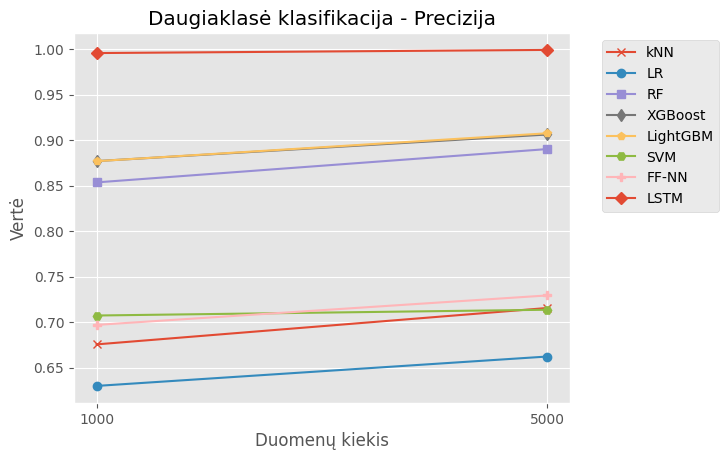

In [27]:
plot_time_series(mc_precision, "Daugiaklasė klasifikacija - Precizija")

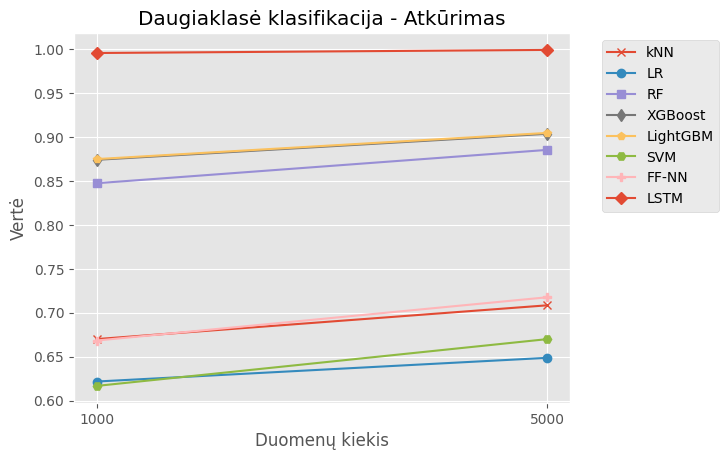

In [28]:
plot_time_series(mc_recall, "Daugiaklasė klasifikacija - Atkūrimas")

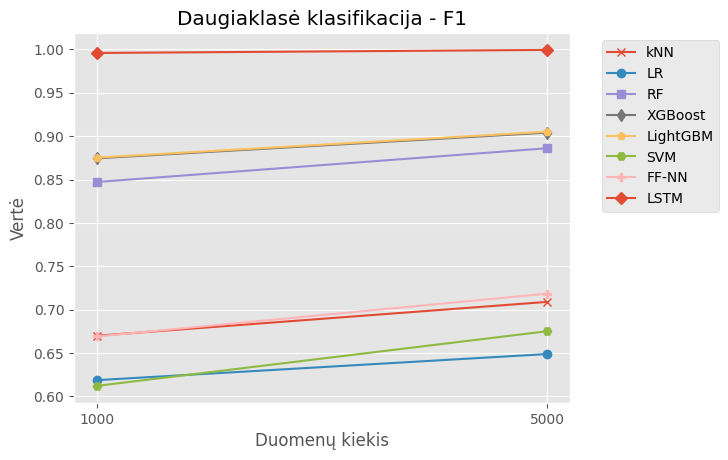

In [29]:
plot_time_series(mc_f1, "Daugiaklasė klasifikacija - F1")

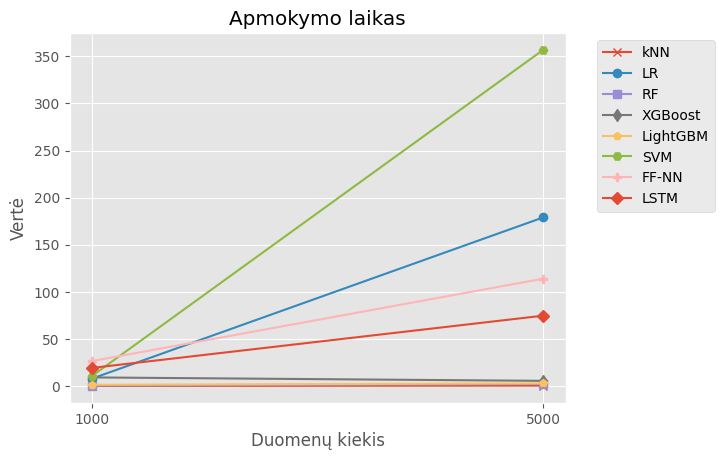

In [30]:
plot_time_series(mc_time, "Apmokymo laikas")

# Results by class

## Precision

In [12]:
benign_precision, bruteforce_precision, ddos_precision, dos_precision, mirai_precision, recon_precision, spoofing_precision, web_precision = [{} for x in range(8)]

In [13]:
new_dict = load_data('results_1000_precision.txt')
precision_1000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['1000'] = precision_1000['Benign']
bruteforce_precision['1000'] = precision_1000['Bruteforce']
ddos_precision['1000'] = precision_1000['DDoS']
dos_precision['1000'] = precision_1000['DoS']
mirai_precision['1000'] = precision_1000['Mirai']
recon_precision['1000'] = precision_1000['Recon']
spoofing_precision['1000'] = precision_1000['Spoofing']
web_precision['1000'] = precision_1000['Web']

In [14]:
new_dict = load_data('results_5000_precision.txt')
precision_5000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['5000'] = precision_5000['Benign']
bruteforce_precision['5000'] = precision_5000['Bruteforce']
ddos_precision['5000'] = precision_5000['DDoS']
dos_precision['5000'] = precision_5000['DoS']
mirai_precision['5000'] = precision_5000['Mirai']
recon_precision['5000'] = precision_5000['Recon']
spoofing_precision['5000'] = precision_5000['Spoofing']
web_precision['5000'] = precision_5000['Web']

In [15]:
new_dict = load_data('results_15000_precision.txt')
precision_15000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['15000'] = precision_15000['Benign']
bruteforce_precision['15000'] = precision_15000['Bruteforce']
ddos_precision['15000'] = precision_15000['DDoS']
dos_precision['15000'] = precision_15000['DoS']
mirai_precision['15000'] = precision_15000['Mirai']
recon_precision['15000'] = precision_15000['Recon']
spoofing_precision['15000'] = precision_15000['Spoofing']
web_precision['15000'] = precision_15000['Web']

In [16]:
new_dict = load_data('results_30000_precision.txt')
precision_30000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['30000'] = precision_30000['Benign']
bruteforce_precision['30000'] = precision_30000['Bruteforce']
ddos_precision['30000'] = precision_30000['DDoS']
dos_precision['30000'] = precision_30000['DoS']
mirai_precision['30000'] = precision_30000['Mirai']
recon_precision['30000'] = precision_30000['Recon']
spoofing_precision['30000'] = precision_30000['Spoofing']
web_precision['30000'] = precision_30000['Web']

In [17]:
new_dict = load_data('results_60000_precision.txt')
precision_60000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['60000'] = precision_60000['Benign']
bruteforce_precision['60000'] = precision_60000['Bruteforce']
ddos_precision['60000'] = precision_60000['DDoS']
dos_precision['60000'] = precision_60000['DoS']
mirai_precision['60000'] = precision_60000['Mirai']
recon_precision['60000'] = precision_60000['Recon']
spoofing_precision['60000'] = precision_60000['Spoofing']
web_precision['60000'] = precision_60000['Web']

## Recall

In [18]:
benign_recall, bruteforce_recall, ddos_recall, dos_recall, mirai_recall, recon_recall, spoofing_recall, web_recall = [{} for x in range(8)]

In [19]:
new_dict = load_data('results_1000_recall.txt')
recall_1000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['1000'] = recall_1000['Benign']
bruteforce_recall['1000'] = recall_1000['Bruteforce']
ddos_recall['1000'] = recall_1000['DDoS']
dos_recall['1000'] = recall_1000['DoS']
mirai_recall['1000'] = recall_1000['Mirai']
recon_recall['1000'] = recall_1000['Recon']
spoofing_recall['1000'] = recall_1000['Spoofing']
web_recall['1000'] = recall_1000['Web']

In [20]:
new_dict = load_data('results_5000_recall.txt')
recall_5000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['5000'] = recall_5000['Benign']
bruteforce_recall['5000'] = recall_5000['Bruteforce']
ddos_recall['5000'] = recall_5000['DDoS']
dos_recall['5000'] = recall_5000['DoS']
mirai_recall['5000'] = recall_5000['Mirai']
recon_recall['5000'] = recall_5000['Recon']
spoofing_recall['5000'] = recall_5000['Spoofing']
web_recall['5000'] = recall_5000['Web']

In [21]:
new_dict = load_data('results_15000_recall.txt')
recall_15000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['15000'] = recall_15000['Benign']
bruteforce_recall['15000'] = recall_15000['Bruteforce']
ddos_recall['15000'] = recall_15000['DDoS']
dos_recall['15000'] = recall_15000['DoS']
mirai_recall['15000'] = recall_15000['Mirai']
recon_recall['15000'] = recall_15000['Recon']
spoofing_recall['15000'] = recall_15000['Spoofing']
web_recall['15000'] = recall_15000['Web']

In [22]:
new_dict = load_data('results_30000_recall.txt')
recall_30000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['30000'] = recall_30000['Benign']
bruteforce_recall['30000'] = recall_30000['Bruteforce']
ddos_recall['30000'] = recall_30000['DDoS']
dos_recall['30000'] = recall_30000['DoS']
mirai_recall['30000'] = recall_30000['Mirai']
recon_recall['30000'] = recall_30000['Recon']
spoofing_recall['30000'] = recall_30000['Spoofing']
web_recall['30000'] = recall_30000['Web']

In [23]:
new_dict = load_data('results_60000_recall.txt')
recall_60000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['60000'] = recall_60000['Benign']
bruteforce_recall['60000'] = recall_60000['Bruteforce']
ddos_recall['60000'] = recall_60000['DDoS']
dos_recall['60000'] = recall_60000['DoS']
mirai_recall['60000'] = recall_60000['Mirai']
recon_recall['60000'] = recall_60000['Recon']
spoofing_recall['60000'] = recall_60000['Spoofing']
web_recall['60000'] = recall_60000['Web']

# F1

In [24]:
benign_f1, bruteforce_f1, ddos_f1, dos_f1, mirai_f1, recon_f1, spoofing_f1, web_f1 = [{} for x in range(8)]

In [25]:
new_dict = load_data('results_1000_f1.txt')
f1_1000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['1000'] = f1_1000['Benign']
bruteforce_f1['1000'] = f1_1000['Bruteforce']
ddos_f1['1000'] = f1_1000['DDoS']
dos_f1['1000'] = f1_1000['DoS']
mirai_f1['1000'] = f1_1000['Mirai']
recon_f1['1000'] = f1_1000['Recon']
spoofing_f1['1000'] = f1_1000['Spoofing']
web_f1['1000'] = f1_1000['Web']

In [26]:
new_dict = load_data('results_5000_f1.txt')
f1_5000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['5000'] = f1_5000['Benign']
bruteforce_f1['5000'] = f1_5000['Bruteforce']
ddos_f1['5000'] = f1_5000['DDoS']
dos_f1['5000'] = f1_5000['DoS']
mirai_f1['5000'] = f1_5000['Mirai']
recon_f1['5000'] = f1_5000['Recon']
spoofing_f1['5000'] = f1_5000['Spoofing']
web_f1['5000'] = f1_5000['Web']

In [27]:
new_dict = load_data('results_15000_f1.txt')
f1_15000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['15000'] = f1_15000['Benign']
bruteforce_f1['15000'] = f1_15000['Bruteforce']
ddos_f1['15000'] = f1_15000['DDoS']
dos_f1['15000'] = f1_15000['DoS']
mirai_f1['15000'] = f1_15000['Mirai']
recon_f1['15000'] = f1_15000['Recon']
spoofing_f1['15000'] = f1_15000['Spoofing']
web_f1['15000'] = f1_15000['Web']

In [28]:
new_dict = load_data('results_30000_f1.txt')
f1_30000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['30000'] = f1_30000['Benign']
bruteforce_f1['30000'] = f1_30000['Bruteforce']
ddos_f1['30000'] = f1_30000['DDoS']
dos_f1['30000'] = f1_30000['DoS']
mirai_f1['30000'] = f1_30000['Mirai']
recon_f1['30000'] = f1_30000['Recon']
spoofing_f1['30000'] = f1_30000['Spoofing']
web_f1['30000'] = f1_30000['Web']

In [29]:
new_dict = load_data('results_60000_f1.txt')
f1_60000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['60000'] = f1_60000['Benign']
bruteforce_f1['60000'] = f1_60000['Bruteforce']
ddos_f1['60000'] = f1_60000['DDoS']
dos_f1['60000'] = f1_60000['DoS']
mirai_f1['60000'] = f1_60000['Mirai']
recon_f1['60000'] = f1_60000['Recon']
spoofing_f1['60000'] = f1_60000['Spoofing']
web_f1['60000'] = f1_60000['Web']

# Plot results by class

## Precision

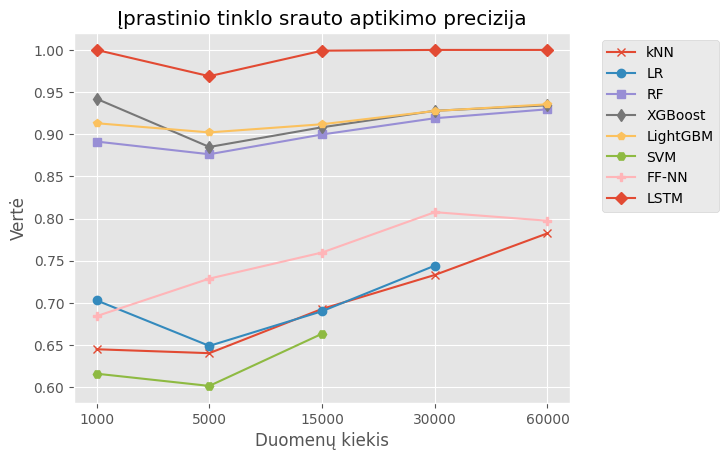

In [30]:
benign_precision = pd.DataFrame(benign_precision).transpose()
plot_time_series(benign_precision, "Įprastinio tinklo srauto aptikimo precizija")

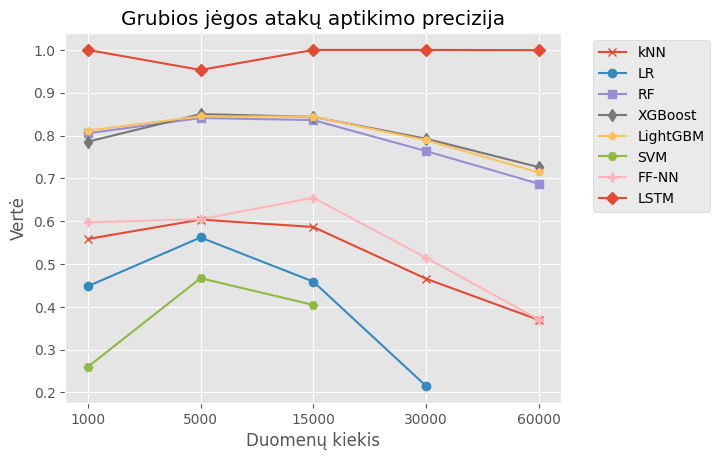

In [31]:
bruteforce_precision = pd.DataFrame(bruteforce_precision).transpose()
plot_time_series(bruteforce_precision, "Grubios jėgos atakų aptikimo precizija")

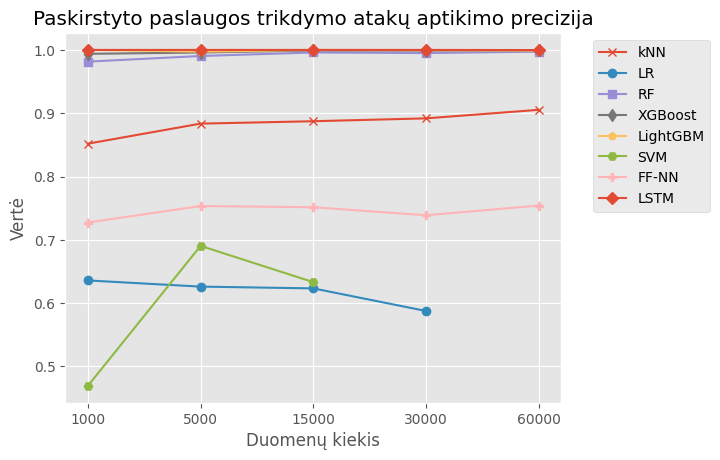

In [32]:
ddos_precision = pd.DataFrame(ddos_precision).transpose()
plot_time_series(ddos_precision, "Paskirstyto paslaugos trikdymo atakų aptikimo precizija")

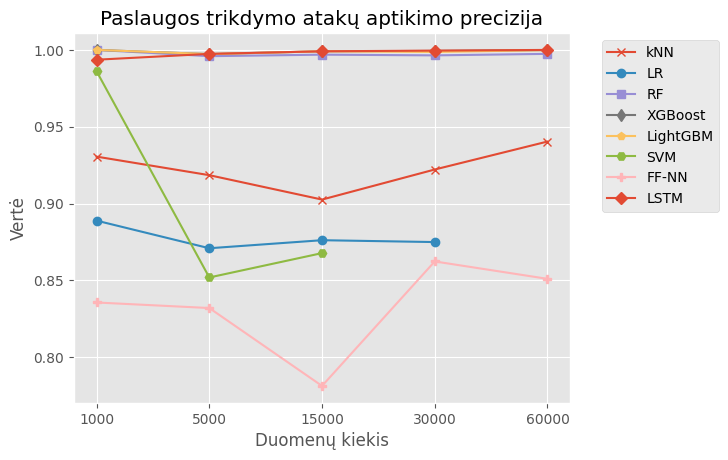

In [33]:
dos_precision = pd.DataFrame(dos_precision).transpose()
plot_time_series(dos_precision, "Paslaugos trikdymo atakų aptikimo precizija")

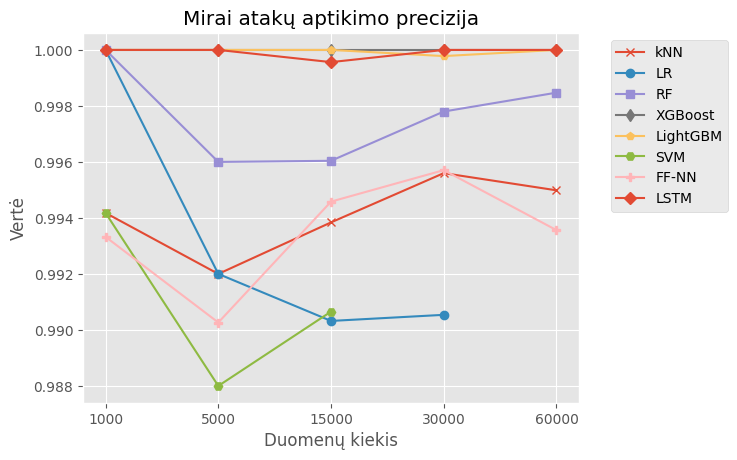

In [34]:
mirai_precision = pd.DataFrame(mirai_precision).transpose()
plot_time_series(mirai_precision, "Mirai atakų aptikimo precizija")

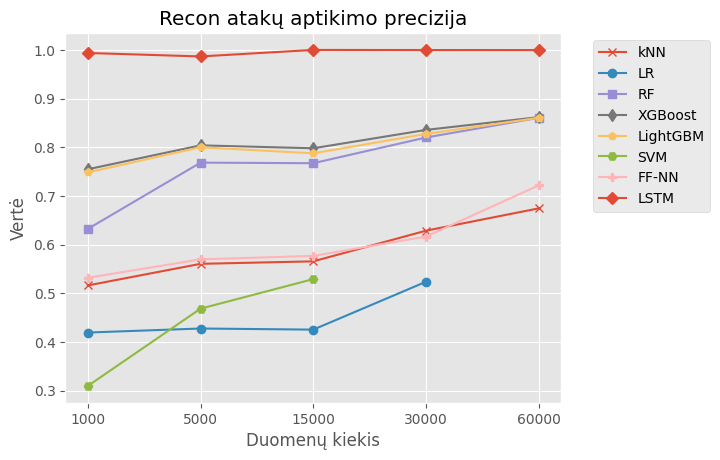

In [35]:
recon_precision = pd.DataFrame(recon_precision).transpose()
plot_time_series(recon_precision, "Recon atakų aptikimo precizija")

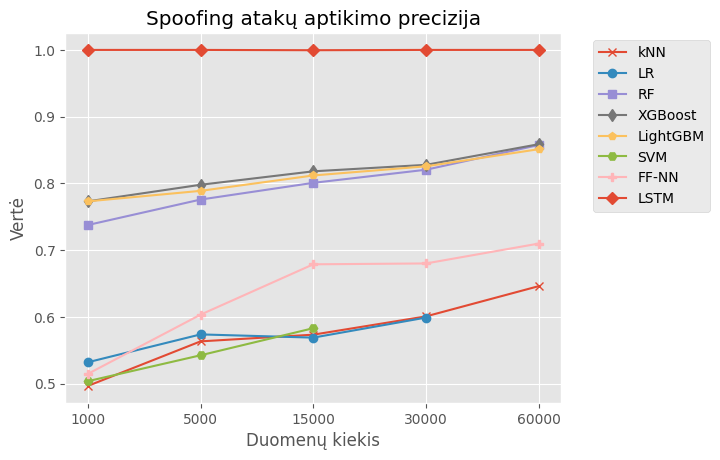

In [36]:
spoofing_precision = pd.DataFrame(spoofing_precision).transpose()
plot_time_series(spoofing_precision, "Spoofing atakų aptikimo precizija")

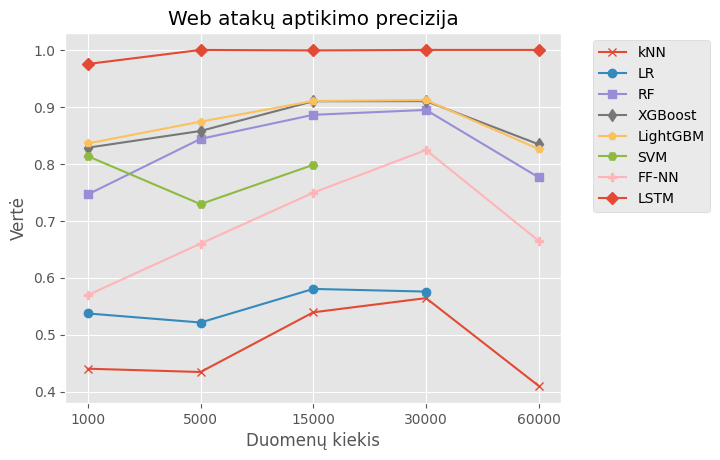

In [37]:
web_precision = pd.DataFrame(web_precision).transpose()
plot_time_series(web_precision, "Web atakų aptikimo precizija")

## Recall

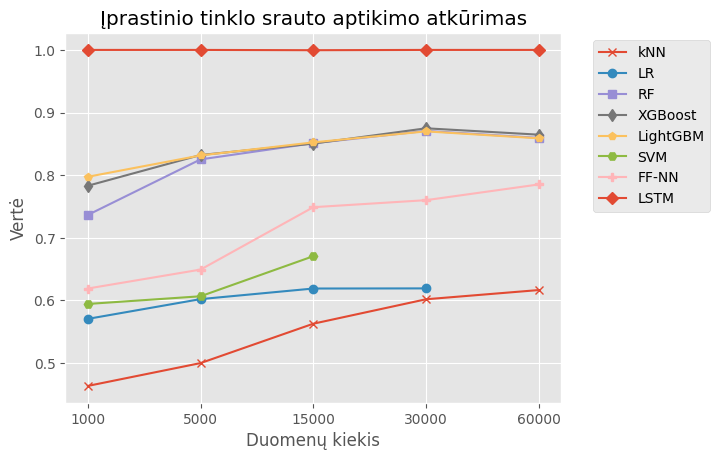

In [38]:
benign_recall = pd.DataFrame(benign_recall).transpose()
plot_time_series(benign_recall, "Įprastinio tinklo srauto aptikimo atkūrimas")

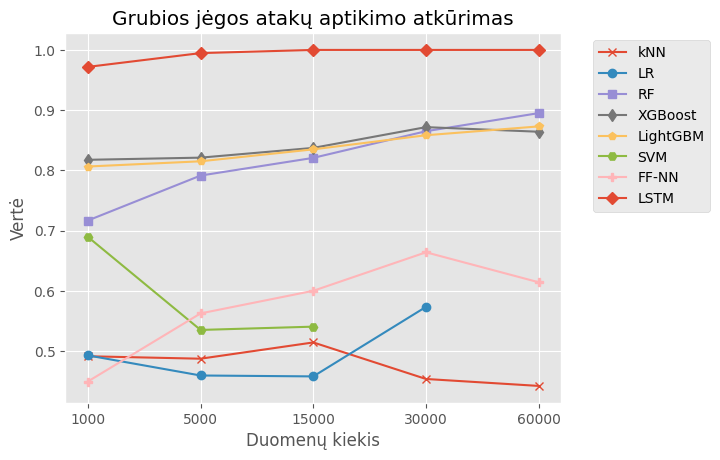

In [39]:
bruteforce_recall = pd.DataFrame(bruteforce_recall).transpose()
plot_time_series(bruteforce_recall, "Grubios jėgos atakų aptikimo atkūrimas")

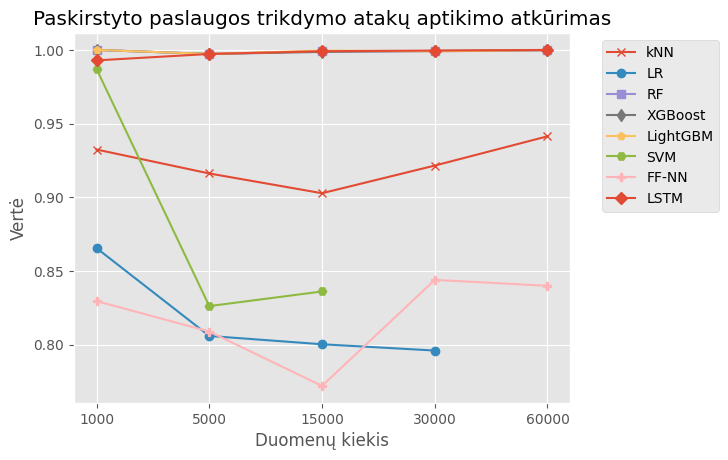

In [40]:
ddos_recall = pd.DataFrame(ddos_recall).transpose()
plot_time_series(ddos_recall, "Paskirstyto paslaugos trikdymo atakų aptikimo atkūrimas")

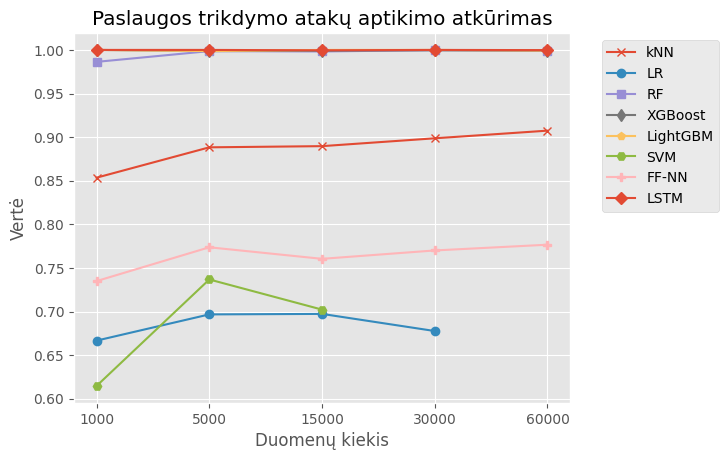

In [41]:
dos_recall = pd.DataFrame(dos_recall).transpose()
plot_time_series(dos_recall, "Paslaugos trikdymo atakų aptikimo atkūrimas")

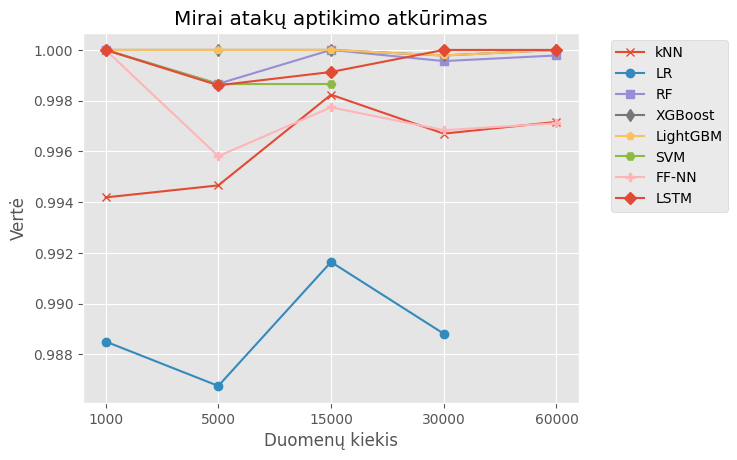

In [42]:
mirai_recall = pd.DataFrame(mirai_recall).transpose()
plot_time_series(mirai_recall, "Mirai atakų aptikimo atkūrimas")

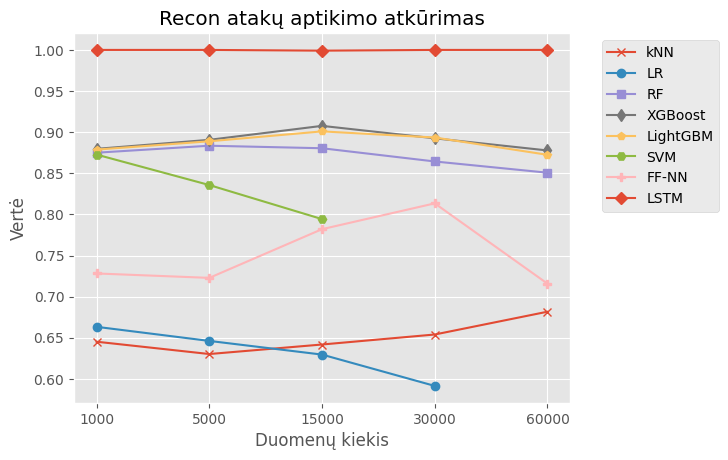

In [43]:
recon_recall = pd.DataFrame(recon_recall).transpose()
plot_time_series(recon_recall, "Recon atakų aptikimo atkūrimas")

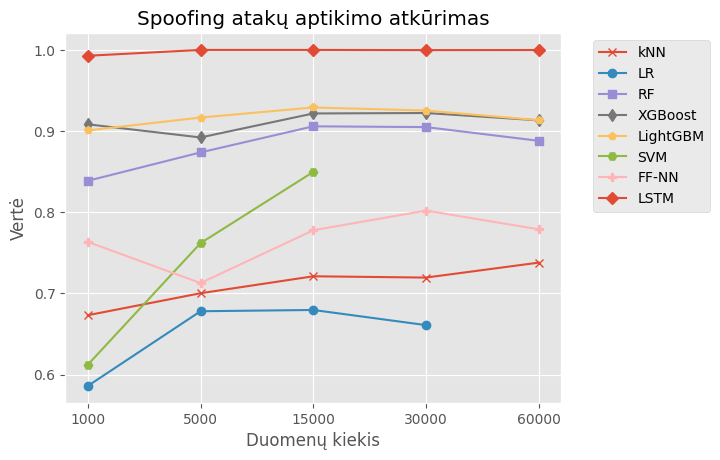

In [44]:
spoofing_recall = pd.DataFrame(spoofing_recall).transpose()
plot_time_series(spoofing_recall, "Spoofing atakų aptikimo atkūrimas")

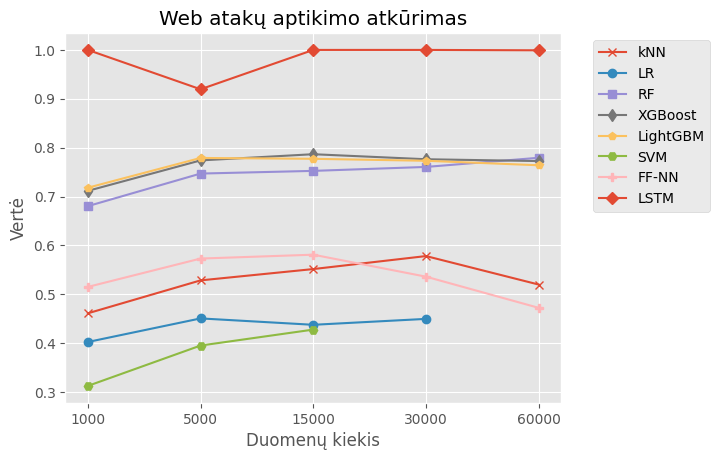

In [45]:
web_recall = pd.DataFrame(web_recall).transpose()
plot_time_series(web_recall, "Web atakų aptikimo atkūrimas")

## F1

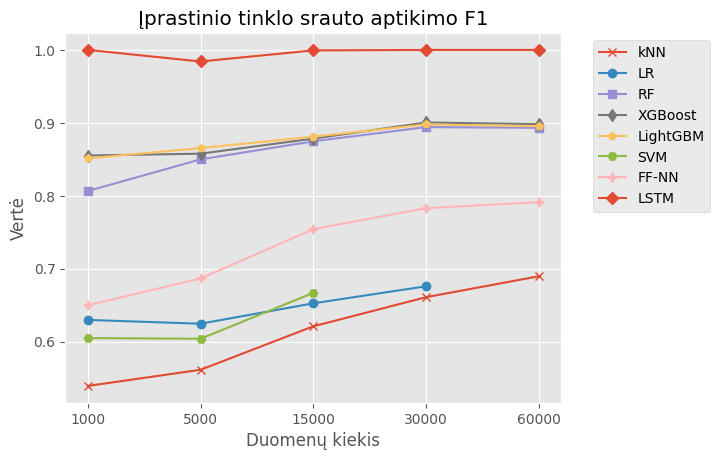

In [46]:
benign_f1 = pd.DataFrame(benign_f1).transpose()
plot_time_series(benign_f1, "Įprastinio tinklo srauto aptikimo F1")

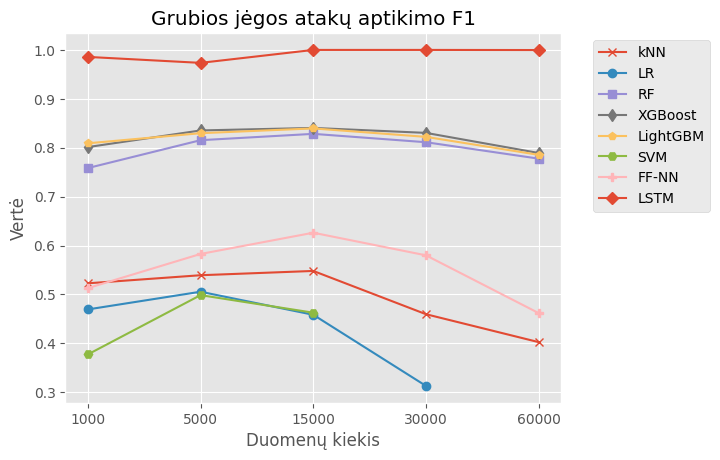

In [47]:
bruteforce_f1 = pd.DataFrame(bruteforce_f1).transpose()
plot_time_series(bruteforce_f1, "Grubios jėgos atakų aptikimo F1")

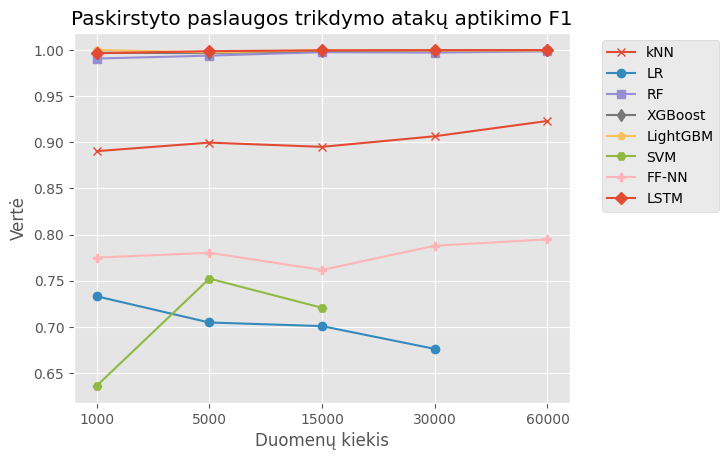

In [48]:
ddos_f1 = pd.DataFrame(ddos_f1).transpose()
plot_time_series(ddos_f1, "Paskirstyto paslaugos trikdymo atakų aptikimo F1")

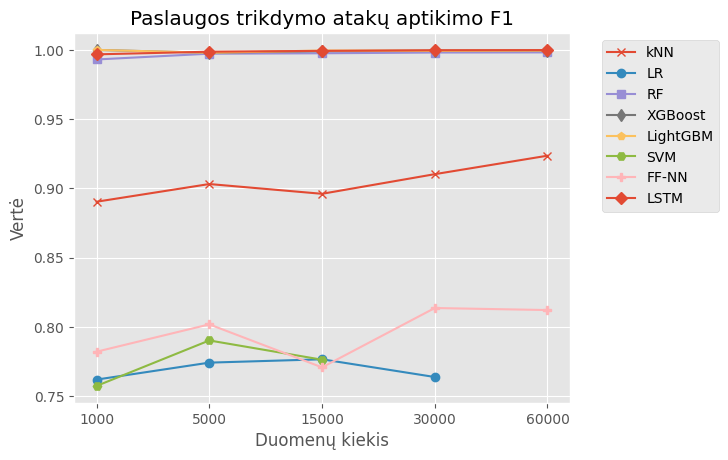

In [49]:
dos_f1 = pd.DataFrame(dos_f1).transpose()
plot_time_series(dos_f1, "Paslaugos trikdymo atakų aptikimo F1")

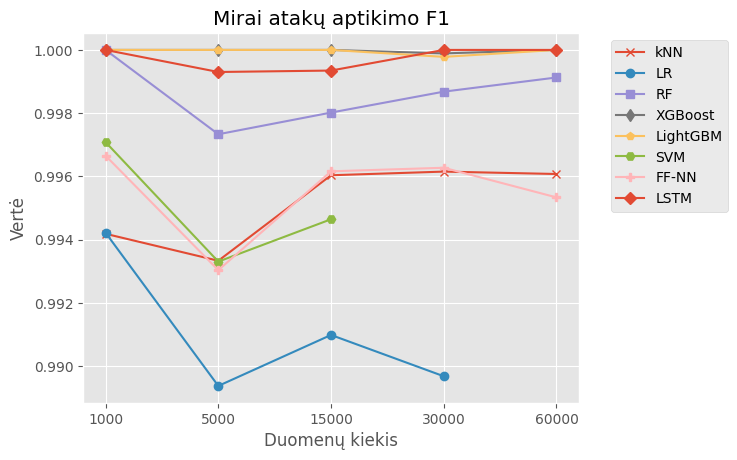

In [50]:
mirai_f1 = pd.DataFrame(mirai_f1).transpose()
plot_time_series(mirai_f1, "Mirai atakų aptikimo F1")

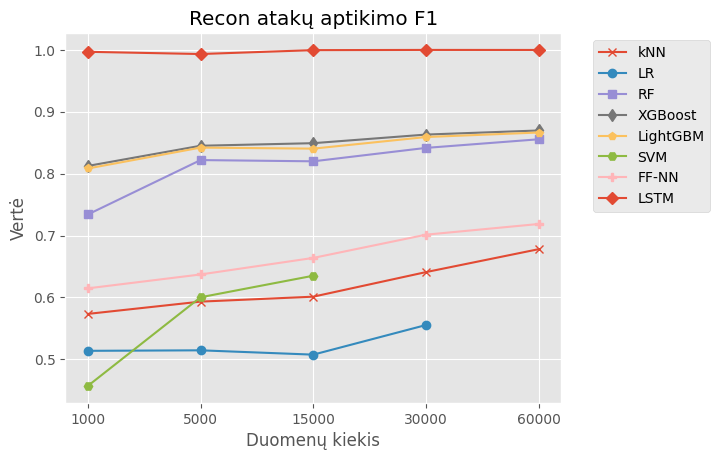

In [51]:
recon_f1 = pd.DataFrame(recon_f1).transpose()
plot_time_series(recon_f1, "Recon atakų aptikimo F1")

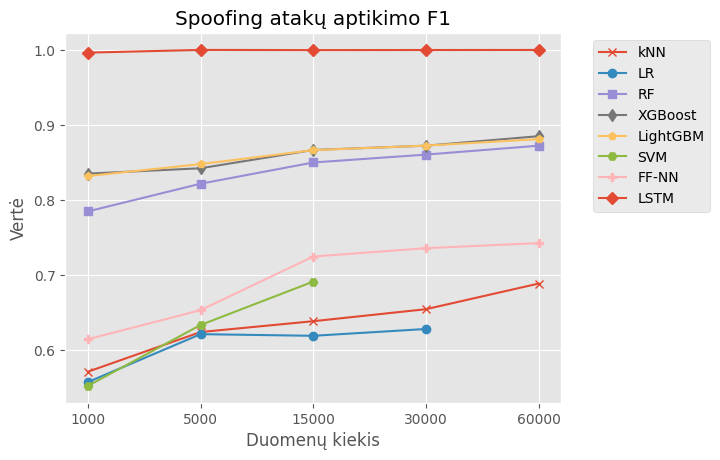

In [52]:
spoofing_f1 = pd.DataFrame(spoofing_f1).transpose()
plot_time_series(spoofing_f1, "Spoofing atakų aptikimo F1")

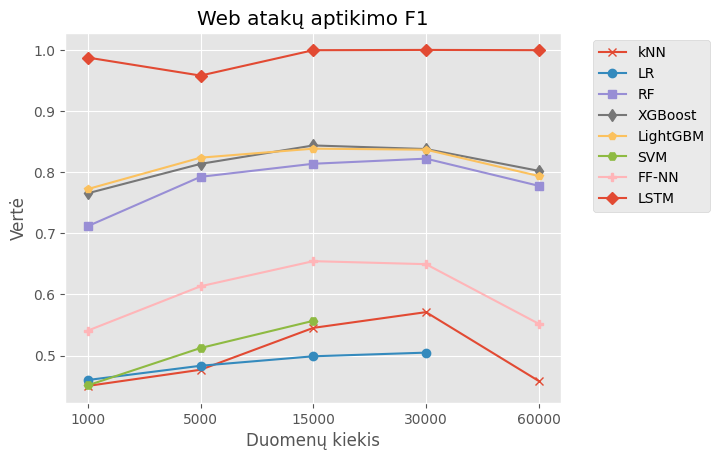

In [53]:
web_f1 = pd.DataFrame(web_f1).transpose()
plot_time_series(web_f1, "Web atakų aptikimo F1")